In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ==========================================
# 1. Load Data
# ==========================================
# Load the processed data from the pickle files created in 00_preprocess
FOLDER_PATH = '../preprocess/'
df_g1 = pd.read_pickle(f'{FOLDER_PATH}df_g1_processed.pkl')
df_g2 = pd.read_pickle(f'{FOLDER_PATH}df_g2_processed.pkl')

print("Data loaded successfully.")
print(f"Group 1 Shape: {df_g1.shape}")
print(f"Group 2 Shape: {df_g2.shape}")

Data loaded successfully.
Group 1 Shape: (175812, 8)
Group 2 Shape: (129770, 14)


In [3]:
# ==========================================
# 2. Visualization Function (Updated for 'rtn'/'vol')
# ==========================================
def plot_asset_group_analysis(df, group_name):
    """
    Plots Correlation, Time Series, and Distributions.
    Looks for columns ending with 'rtn' and 'vol'.
    """
    # Identify columns based on user specified suffixes
    ret_cols = [c for c in df.columns if c.endswith('rtn')]
    vol_cols = [c for c in df.columns if c.endswith('vol')]

    # Check if columns exist
    if not ret_cols:
        print(f"Warning: No columns ending with 'rtn' found in {group_name}. Checking columns: {df.columns.tolist()}")
        return

    # Create a clean copy dropping NaNs just for the columns we plot
    # (Avoids empty plots due to initial NaNs from shifting)
    plot_df = df.dropna(subset=ret_cols + vol_cols).copy()

    # Create Figure
    fig = plt.figure(figsize=(20, 12))
    plt.suptitle(f"Analysis for {group_name}", fontsize=20, y=0.95)

    # --- 1. Correlation Matrix (Returns) ---
    ax1 = plt.subplot(2, 3, 3)
    corr_matrix = plot_df[ret_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1, fmt=".2f")
    ax1.set_title('Correlation Matrix (Returns)')

    # --- 2. Time Series: Cumulative Returns ---
    ax2 = plt.subplot(2, 3, 1)
    for col in ret_cols:
        # Calculate cumulative returns: (1+r).cumprod() to normalize start at 1.0
        cum_ret = (1 + plot_df[col]).cumprod()
        # Clean label name (remove _rtn or rtn)
        label_name = col.replace('_rtn', '').replace('rtn', '')
        ax2.plot(plot_df.index, cum_ret, label=label_name, linewidth=1)

    ax2.set_title('Time Series: Cumulative Returns (Growth)')
    ax2.set_ylabel('Growth (Base=1.0)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # --- 3. Time Series: Volatility ---
    ax3 = plt.subplot(2, 3, 2)
    for col in vol_cols:
        label_name = col.replace('_vol', '').replace('vol', '')
        ax3.plot(plot_df.index, plot_df[col], label=label_name, linewidth=1, alpha=0.8)

    ax3.set_title('Time Series: Annualized Volatility')
    ax3.set_ylabel('Volatility (Ann.)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # --- 4. Histogram: Returns ---
    ax4 = plt.subplot(2, 3, 4)
    for col in ret_cols:
        label_name = col.replace('_rtn', '').replace('rtn', '')
        # Truncate outliers for better visualization view (1% - 99%)
        data_clean = plot_df[col]
        sns.histplot(data_clean, kde=True, label=label_name,
                     element="step", stat="density", alpha=0.3, ax=ax4)

    ax4.set_title('Distribution: Log Returns')
    # Auto-adjust X-axis to ignore extreme outliers
    q_low = plot_df[ret_cols].quantile(0.005).min()
    q_high = plot_df[ret_cols].quantile(0.995).max()
    ax4.set_xlim(q_low, q_high)
    ax4.legend()

    # --- 5. Histogram: Volatility ---
    ax5 = plt.subplot(2, 3, 5)
    for col in vol_cols:
        label_name = col.replace('_vol', '').replace('vol', '')
        sns.kdeplot(plot_df[col], label=label_name, fill=True, alpha=0.2, ax=ax5)
    ax5.set_title('Distribution: Volatility (Density)')
    ax5.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Visualizing Group 1...


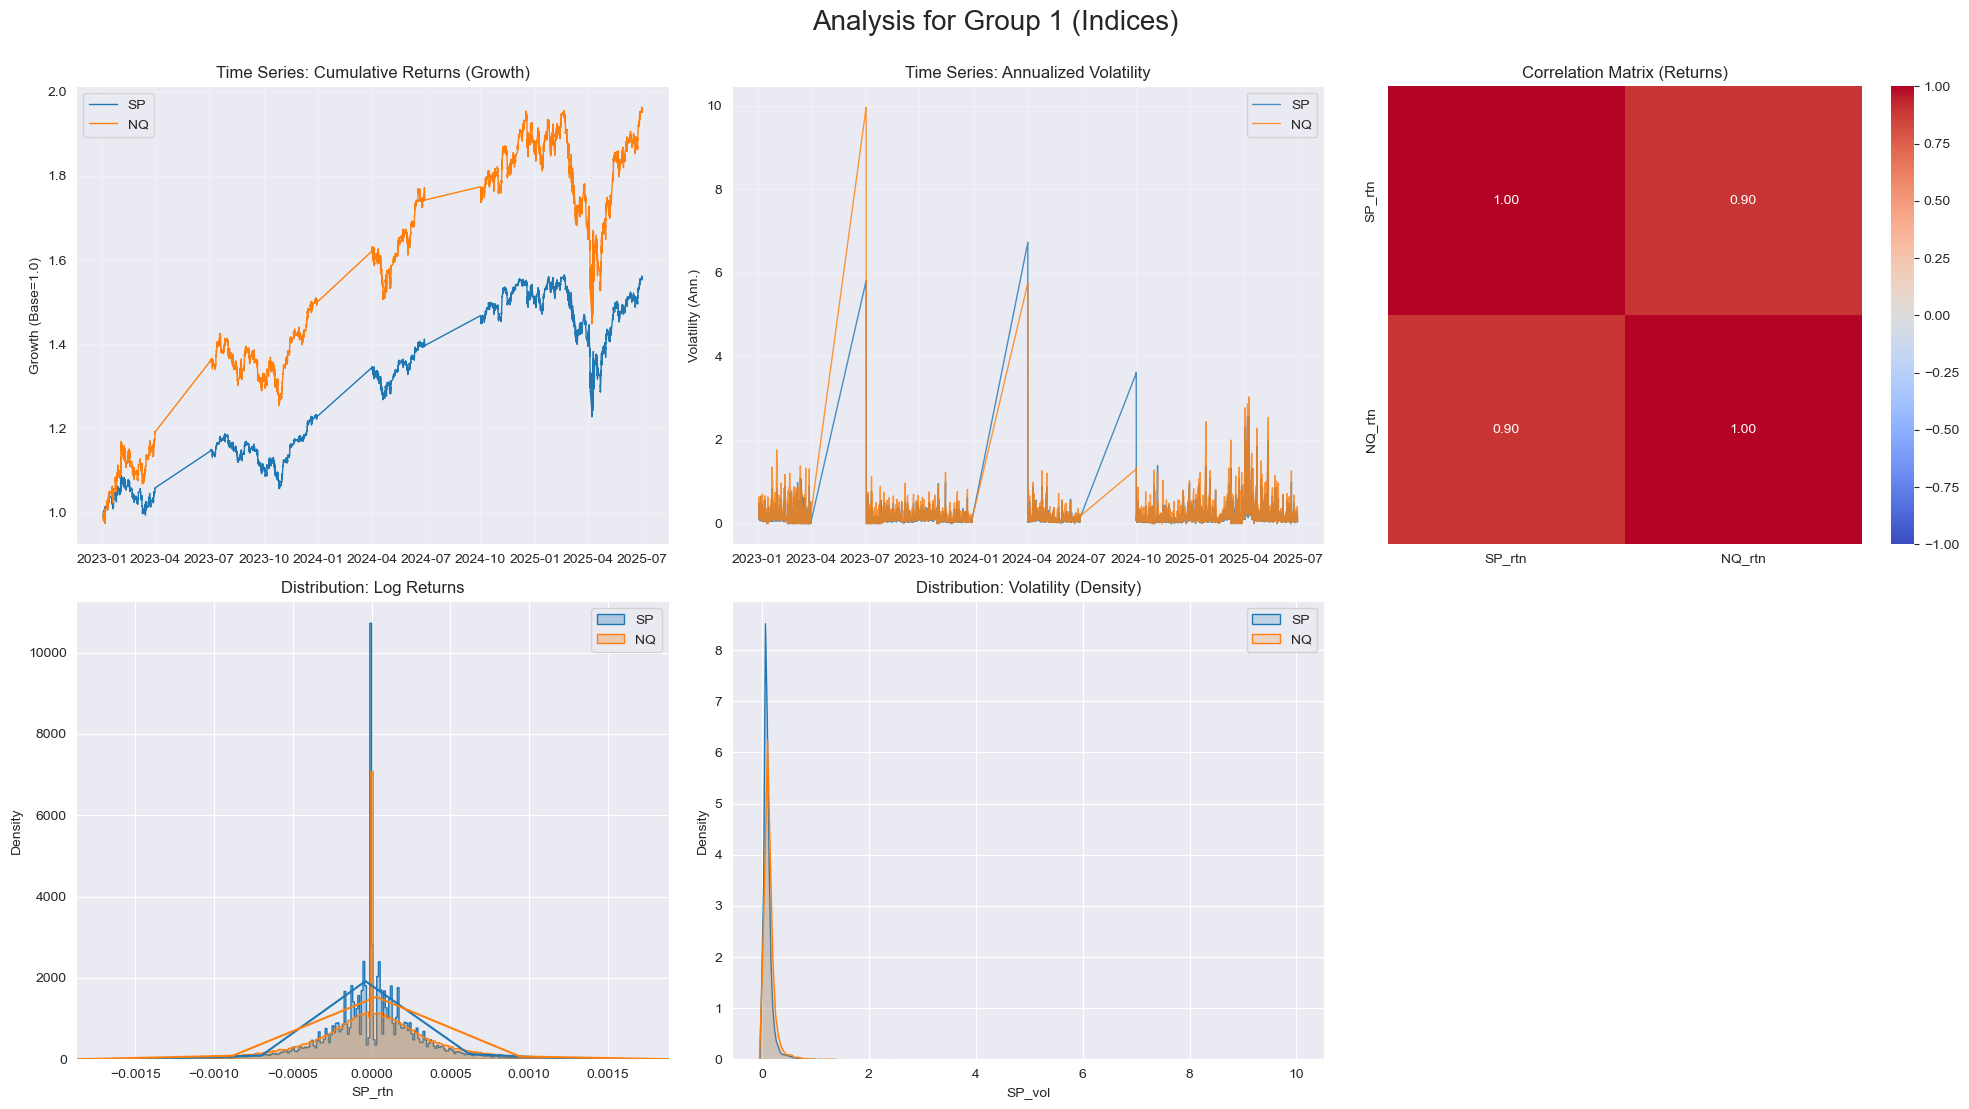



Visualizing Group 2...


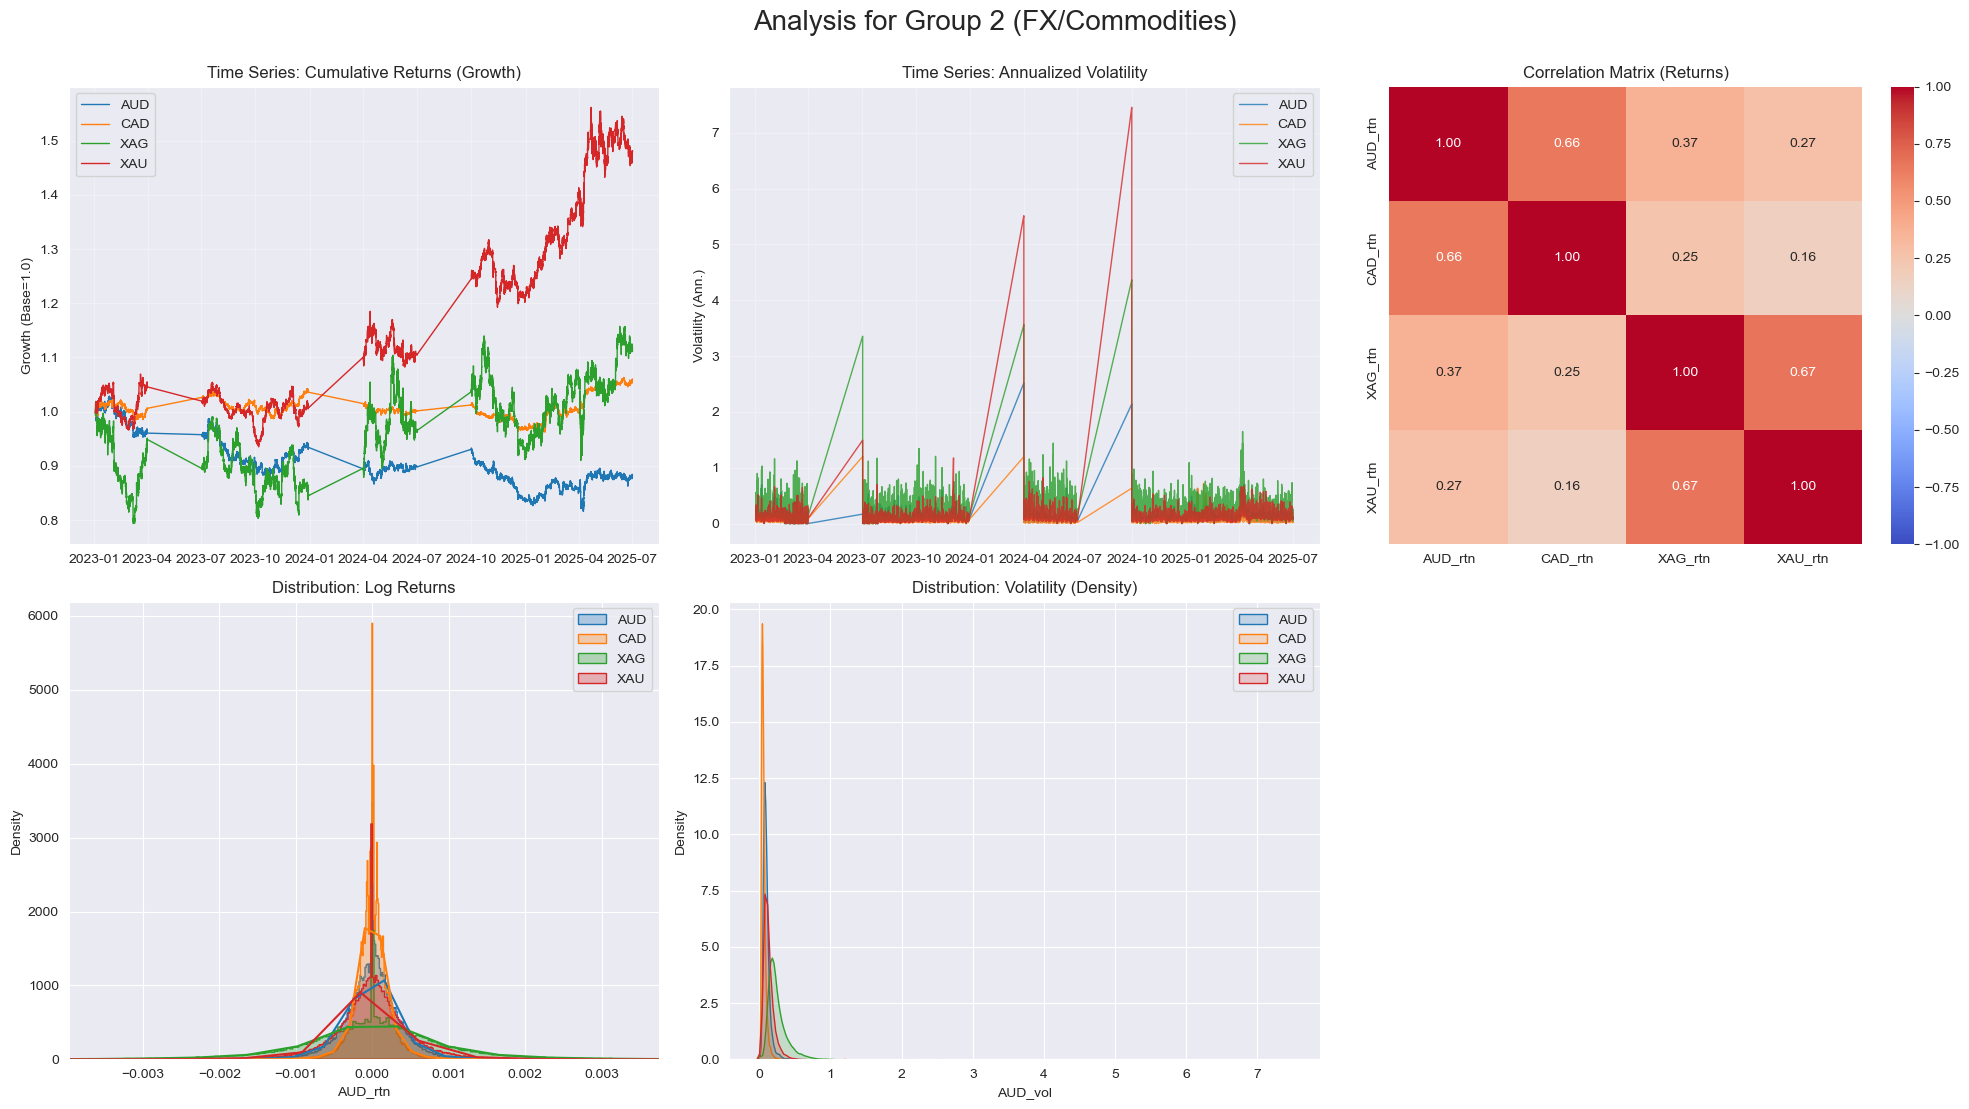

In [4]:
# ==========================================
# 3. Execute Plotting
# ==========================================

print("Visualizing Group 1...")
plot_asset_group_analysis(df_g1, "Group 1 (Indices)")

print("\n" + "="*50 + "\n")

print("Visualizing Group 2...")
plot_asset_group_analysis(df_g2, "Group 2 (FX/Commodities)")